In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
ds_perc = pd.read_csv("../project/dataset_perc.csv", encoding="ISO-8859-1")

In [3]:
ds_perc.describe(include='all')

,iyear,region,region_txt,Armed Assault_%,Assassination_%,Bombing/Explosion_%,Facility/Infrastructure Attack_%,Hijacking_%,Hostage Taking (Barricade Incident)_%,Hostage Taking (Kidnapping)_%,...,targtype_unknown_%,Religious Figures/Institutions_%,Educational Institution_%,Government (Diplomatic)_%,Terrorists/Non-State Militia_%,ran_unk_%,ran_no_%,ran_ok_%,Population in urban agglomerations of more than 1 million (percentage of total population)_%,"Hospital beds (per 1,000 people)_%"
count,529.000000,529.000000,529,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,...,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
unique,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1994.155009,6.406427,NaN,0.194477,0.127995,0.428859,0.116138,0.015079,0.009607,0.060577,...,0.012318,0.033040,0.022426,0.069759,0.010932,0.046805,0.808300,0.044706,23.657773,2.831893
std,13.884350,3.487971,NaN,0.169884,0.147281,0.234628,0.183407,0.065719,0.048886,0.098780,...,0.028660,0.082553,0.044781,0.143278,0.055652,0.159392,0.335408,0.116844,16.097330,3.351031
min,1970.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1982.000000,3.000000,NaN,0.057851,0.028302,0.277831,0.010936,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.803922,0.000000,11.919282,0.000000
50%,1995.000000,6.000000,NaN,0.166667,0.083676,0.433962,0.042735,0.000000,0.000000,0.026846,...,0.000000,0.013158,0.010601,0.020202,0.000000,0.000000,0.987512,0.000000,20.056120,1.629500
75%,2006.000000,10.000000,NaN,0.281818,0.178571,0.582375,0.129870,0.005656,0.005181,0.075472,...,0.011858,0.034483,0.027027,0.059937,0.008621,0.000000,1.000000,0.033333,34.592446,5.025000


In [4]:
ds_perc.columns

Index(['iyear', 'region', 'region_txt', 'Armed Assault_%', 'Assassination_%',
       'Bombing/Explosion_%', 'Facility/Infrastructure Attack_%',
       'Hijacking_%', 'Hostage Taking (Barricade Incident)_%',
       'Hostage Taking (Kidnapping)_%', 'Unarmed Assault_%',
       'attacktype1_unknown_%', 'nkill_%', 'nwound_%', 'suicide_%',
       'Private Citizens & Property_%', 'Military_%', 'Police_%',
       'Government (General)_%', 'Business_%', 'Transportation_%',
       'Utilities_%', 'targtype_unknown_%', 'Religious Figures/Institutions_%',
       'Educational Institution_%', 'Government (Diplomatic)_%',
       'Terrorists/Non-State Militia_%', 'ran_unk_%', 'ran_no_%', 'ran_ok_%',
       'Population in urban agglomerations of more than 1 million (percentage of total population)_%',
       'Hospital beds (per 1,000 people)_%'],
      dtype='object')

In [5]:
ransom = ds_perc[['nkill_%','nwound_%','ran_unk_%','ran_no_%','ran_ok_%']]

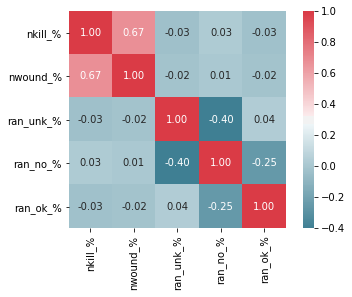

In [6]:
corr = ransom.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot=True, fmt='.2f')

In [7]:
target = ds_perc[['nwound_%','nkill_%','Government (General)_%', 'Business_%', 'Transportation_%',
       'Utilities_%', 'targtype_unknown_%', 'Religious Figures/Institutions_%',
       'Educational Institution_%', 'Government (Diplomatic)_%','Terrorists/Non-State Militia_%']]

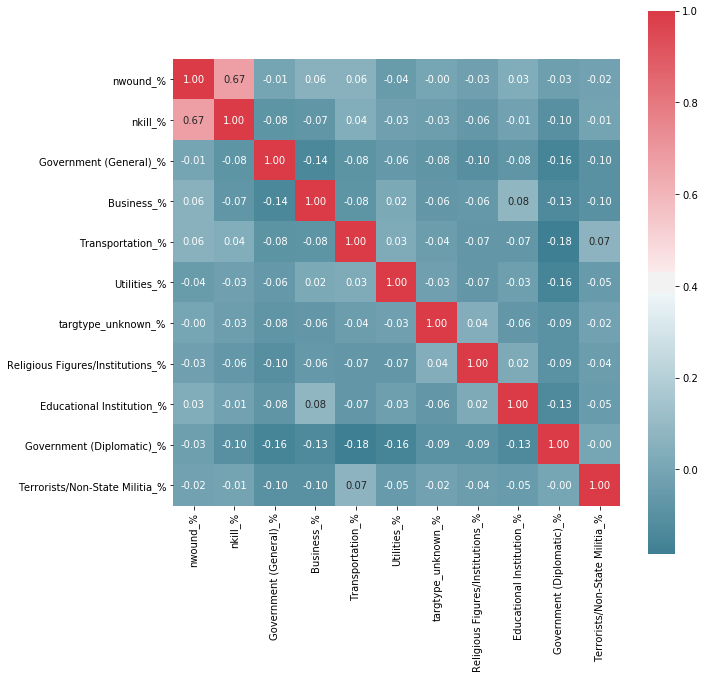

In [8]:
corr = target.corr()
plt.subplots(figsize=(10,10))       
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot=True, fmt='.2f')

In [9]:
attack = ds_perc[['Armed Assault_%', 'Assassination_%',
       'Bombing/Explosion_%', 'Facility/Infrastructure Attack_%',
       'Hijacking_%', 'Hostage Taking (Barricade Incident)_%',
       'Hostage Taking (Kidnapping)_%', 'Unarmed Assault_%',
       'attacktype1_unknown_%', 'nkill_%', 'nwound_%']]

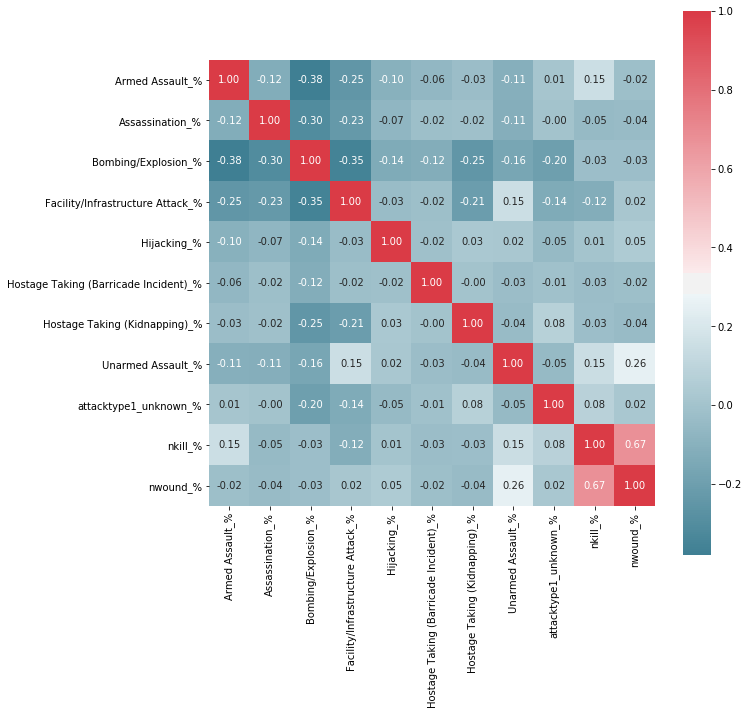

In [10]:
corr = attack.corr()
plt.subplots(figsize=(10,10))       
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot=True, fmt='.2f')

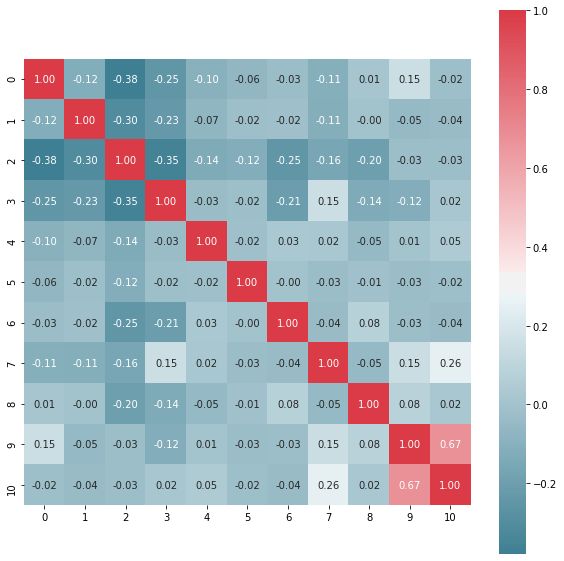

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
attack = pd.DataFrame(scaler.fit_transform(attack))
corr = attack.corr()
plt.subplots(figsize=(10,10))       
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot=True, fmt='.2f')

In [12]:
columns1 = ['nwound_%','Armed Assault_%', 'Assassination_%',
       'Bombing/Explosion_%', 'Facility/Infrastructure Attack_%',
       'Hijacking_%', 'Hostage Taking (Barricade Incident)_%',
       'Hostage Taking (Kidnapping)_%', 'Unarmed Assault_%',
       'attacktype1_unknown_%', 'suicide_%',
       'Private Citizens & Property_%', 'Military_%', 'Police_%',
       'Government (General)_%', 'Business_%', 'Transportation_%',
       'Utilities_%', 'targtype_unknown_%', 'Religious Figures/Institutions_%',
       'Educational Institution_%', 'Government (Diplomatic)_%',
       'Terrorists/Non-State Militia_%', 'ran_unk_%', 'ran_no_%', 'ran_ok_%',
       'Population in urban agglomerations of more than 1 million (percentage of total population)_%',
       'Hospital beds (per 1,000 people)_%']
columns2 = ['nkill_%','Armed Assault_%', 'Assassination_%',
       'Bombing/Explosion_%', 'Facility/Infrastructure Attack_%',
       'Hijacking_%', 'Hostage Taking (Barricade Incident)_%',
       'Hostage Taking (Kidnapping)_%', 'Unarmed Assault_%',
       'attacktype1_unknown_%', 'suicide_%',
       'Private Citizens & Property_%', 'Military_%', 'Police_%',
       'Government (General)_%', 'Business_%', 'Transportation_%',
       'Utilities_%', 'targtype_unknown_%', 'Religious Figures/Institutions_%',
       'Educational Institution_%', 'Government (Diplomatic)_%',
       'Terrorists/Non-State Militia_%', 'ran_unk_%', 'ran_no_%', 'ran_ok_%',
       'Population in urban agglomerations of more than 1 million (percentage of total population)_%',
       'Hospital beds (per 1,000 people)_%']

In [13]:
X = ds_perc[columns1]
Y = ds_perc['nkill_%']

In [14]:
from sklearn.model_selection import train_test_split
X_train_kill, X_test_kill, Y_train_kill, Y_test_kill = train_test_split(X, Y, test_size=0.20, random_state=33)

In [15]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression().fit(X_train_kill, Y_train_kill)
print(linReg.score(X_train_kill, Y_train_kill))
print(linReg.score(X_test_kill, Y_test_kill))

0.6146996427436385
0.1224062133068946


In [16]:
linReg.coef_

array([ 1.49294063e-01,  2.45513847e+00,  1.05156982e-01, -2.50271874e-01,
       -1.18961245e+00, -2.03222851e+00, -1.04711943e+00, -4.85108082e-01,
        1.39200746e+00,  1.05203744e+00,  1.08696385e+01,  1.49764122e-01,
        3.36974908e-01, -2.92181623e+00, -3.33250698e+00, -1.87129249e+00,
       -3.43965837e+00, -3.24680152e+00, -1.30352495e+01, -3.07117715e+00,
       -5.56352943e+00, -3.29571996e+00,  1.26332557e-02,  3.29466625e-01,
        3.05655789e-01, -1.33709769e+00, -2.48998967e-02, -7.02196082e-02])

In [17]:
print('intercept ', linReg.intercept_)
coefficients = pd.Series(linReg.coef_ , index=X.columns)
coefficients.sort_values()

intercept  3.4822381935855384


targtype_unknown_%                                                                             -13.035250
Educational Institution_%                                                                       -5.563529
Transportation_%                                                                                -3.439658
Government (General)_%                                                                          -3.332507
Government (Diplomatic)_%                                                                       -3.295720
Utilities_%                                                                                     -3.246802
Religious Figures/Institutions_%                                                                -3.071177
Police_%                                                                                        -2.921816
Hijacking_%                                                                                     -2.032229
Business_%                                    

### DATASET NO %

In [18]:
ds = pd.read_csv("../project/dataset.csv", encoding="ISO-8859-1")
ds.columns

Index(['iyear', 'region', 'region_txt', 'Armed Assault', 'Assassination',
       'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Hijacking',
       'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)',
       'Unarmed Assault', 'attacktype1_unknown', 'attacktype1_count', 'nkill',
       'nwound', 'suicide', 'attack_count', 'Business',
       'Educational Institution', 'Government (Diplomatic)',
       'Government (General)', 'Military', 'Police',
       'Private Citizens & Property', 'Religious Figures/Institutions',
       'Terrorists/Non-State Militia', 'Transportation', 'targtype_unknown',
       'Utilities', 'targtype1_count', 'ransom_Unkn', 'ransom_No', 'ransom_Ok',
       'ransom_count', 'beds_count', 'urban_count',
       'Hospital beds (per 1,000 people)',
       'Population in urban agglomerations of more than 1 million (percentage of total population)'],
      dtype='object')

In [19]:
ds.describe(include='all')

,iyear,region,region_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),...,Utilities,targtype1_count,ransom_Unkn,ransom_No,ransom_Ok,ransom_count,beds_count,urban_count,"Hospital beds (per 1,000 people)",Population in urban agglomerations of more than 1 million (percentage of total population)
count,529.000000,529.000000,529,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,...,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
unique,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1994.155009,6.406427,NaN,80.659735,36.506616,166.833648,19.576560,1.245747,1.873346,21.092628,...,11.385633,343.461248,2.642722,141.179584,2.455577,146.277883,2.275992,5.151229,10.610529,119.535548
std,13.884350,3.487971,NaN,172.507876,66.182058,450.110276,36.833963,2.585673,4.844654,58.749250,...,30.599667,771.965994,15.502900,255.166931,4.969834,257.195879,3.003693,4.391776,19.615080,105.985691
min,1970.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1982.000000,3.000000,NaN,2.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,12.000000,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,0.000000,43.859899
50%,1995.000000,6.000000,NaN,14.000000,7.000000,36.000000,5.000000,0.000000,0.000000,3.000000,...,1.000000,95.000000,0.000000,19.000000,0.000000,24.000000,1.000000,4.000000,3.042100,79.587676
75%,2006.000000,10.000000,NaN,67.000000,35.000000,150.000000,20.000000,1.000000,1.000000,15.000000,...,6.000000,331.000000,0.000000,157.000000,2.000000,170.000000,3.000000,8.000000,11.600000,194.532277


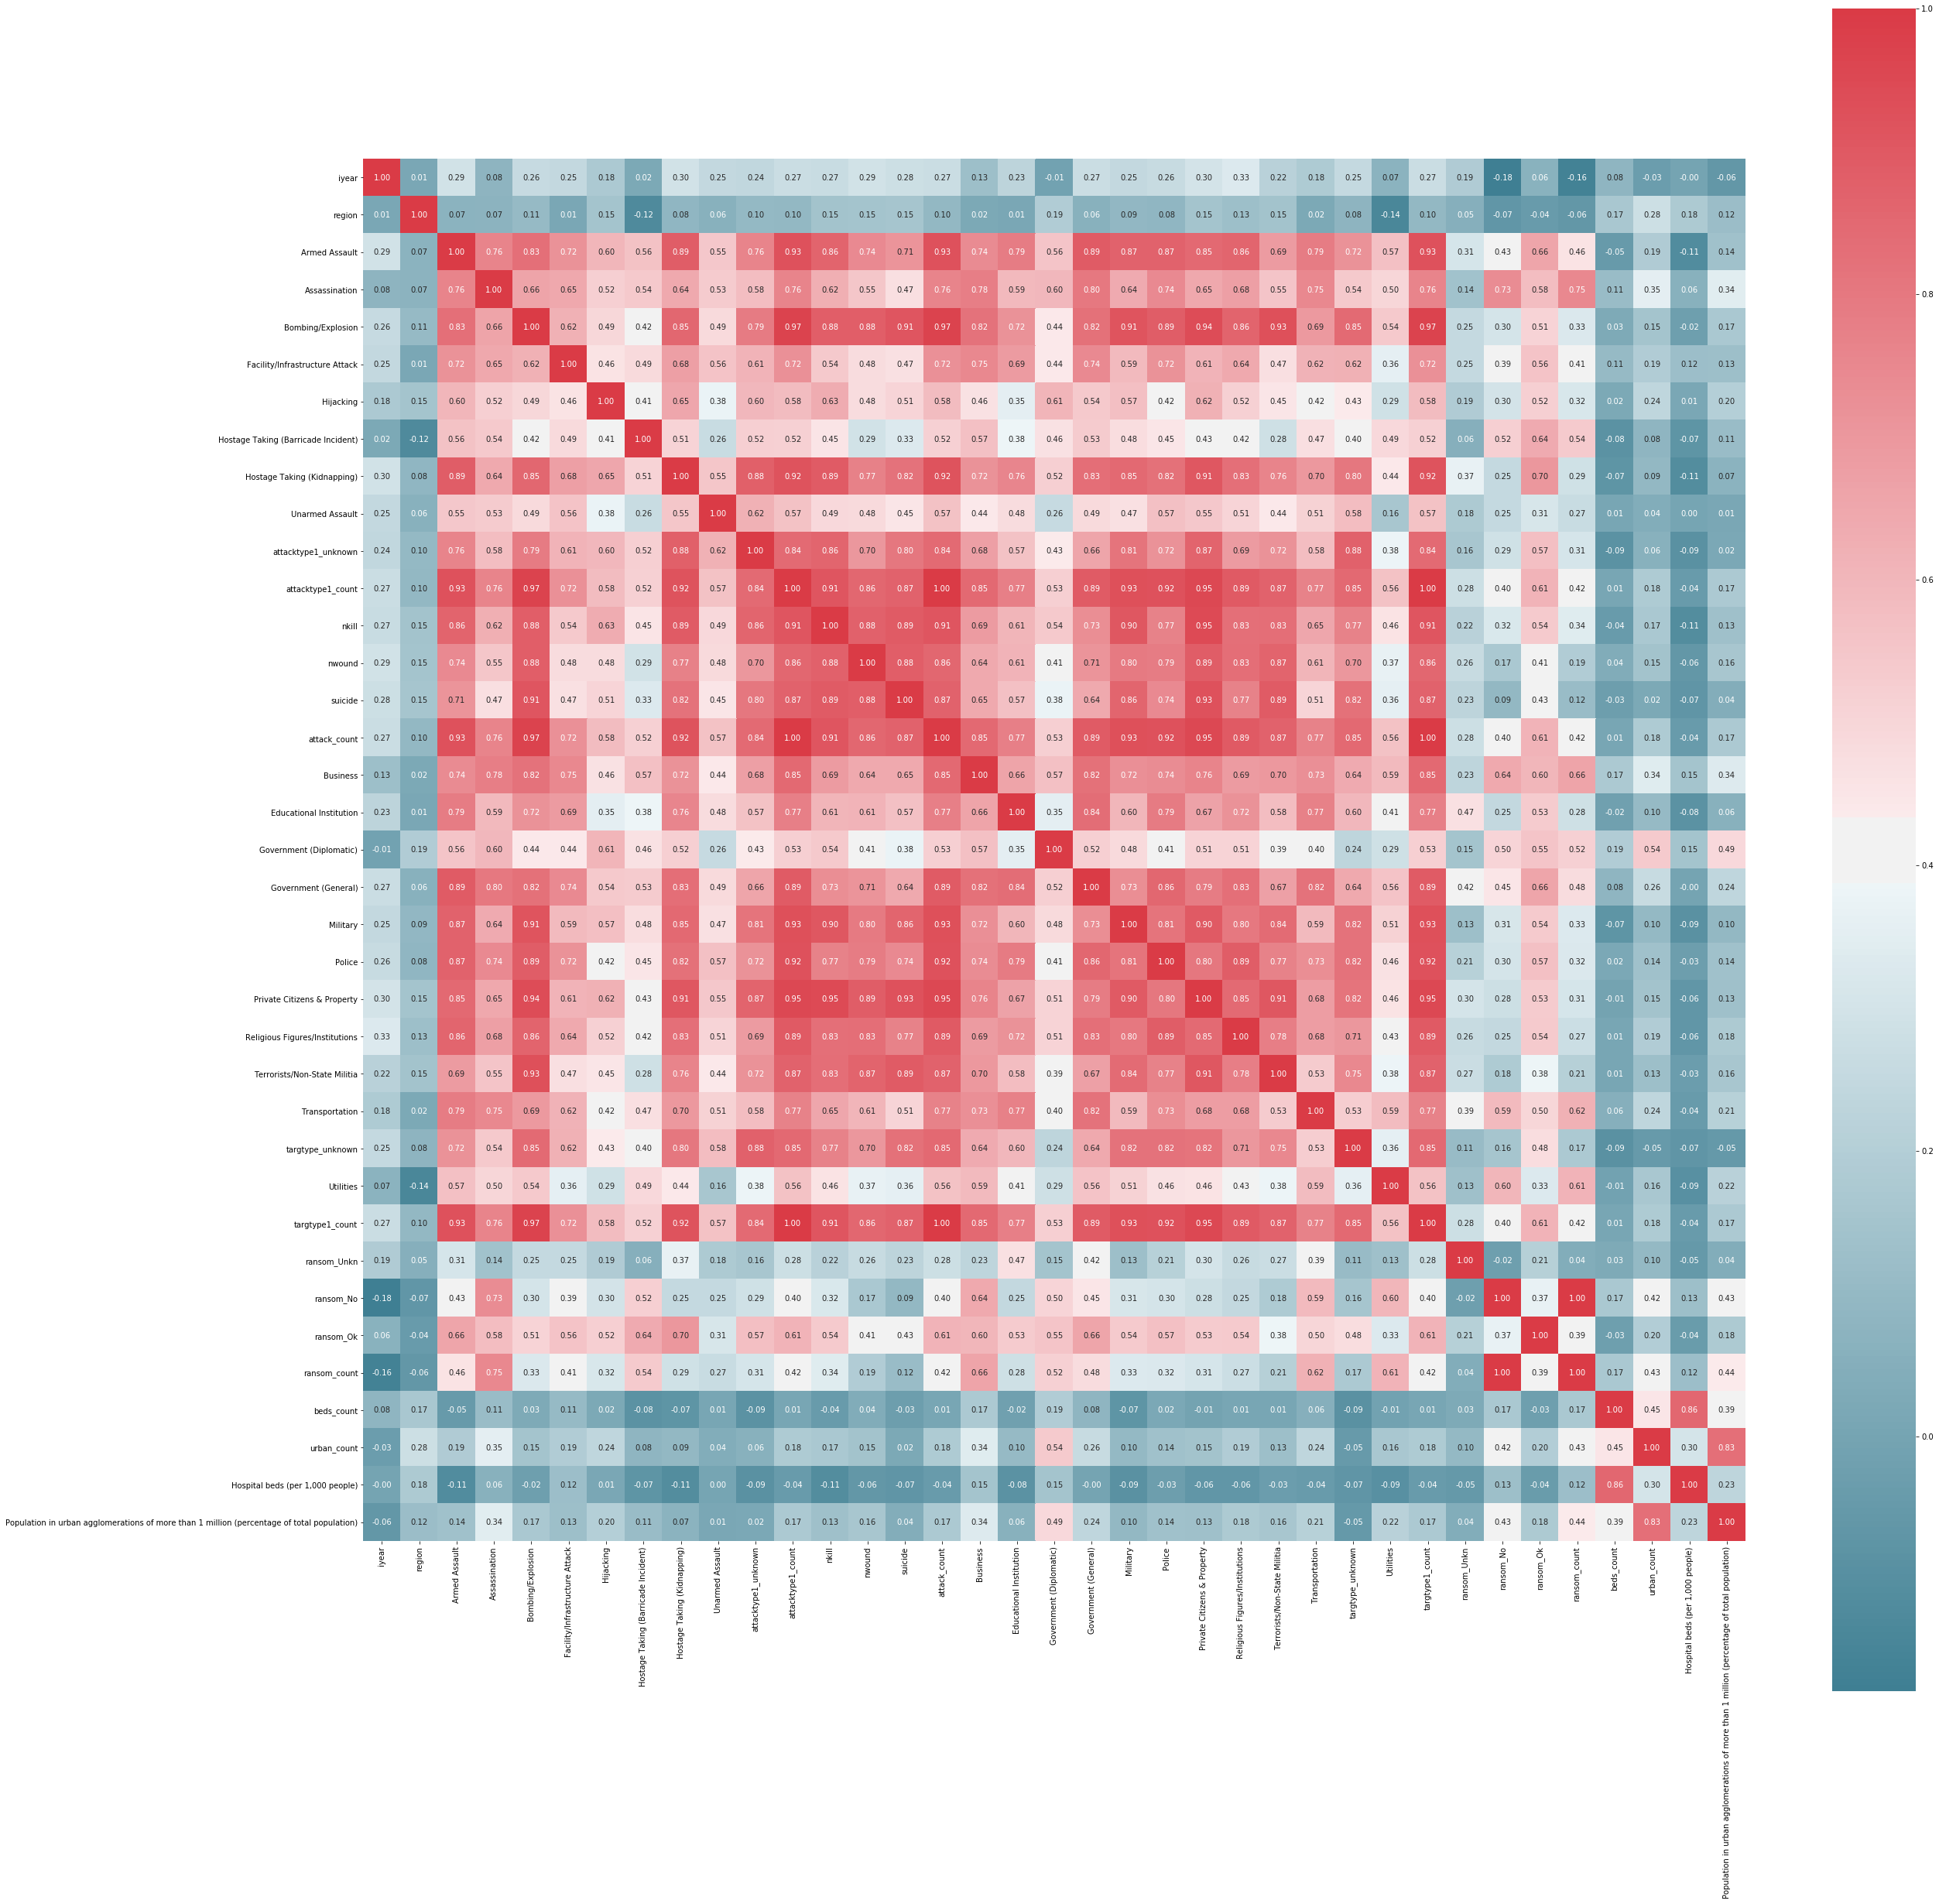

In [20]:
corr = ds.corr()
plt.subplots(figsize=(40,40))       
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot=True, fmt='.2f')

vado a togliere:
* iyear
* region
* hospital beds
* population in urban (potrebbe essere migliore considerando solo popolazione?)

In [21]:
columns = ['nkill',
       'nwound','Armed Assault', 'Assassination','Bombing/Explosion', 'Facility/Infrastructure Attack', 'Hijacking',
       'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)',
       'Unarmed Assault','attacktype1_unknown','suicide','Business',
       'Educational Institution', 'Government (Diplomatic)',
       'Government (General)', 'Military', 'Police',
       'Private Citizens & Property', 'Religious Figures/Institutions',
       'Terrorists/Non-State Militia', 'Transportation', 'targtype_unknown',
       'Utilities','ransom_Unkn', 'ransom_No', 'ransom_Ok']
len(columns)

27

In [22]:
ds_new = ds[columns]

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pieno = pd.DataFrame(scaler.fit_transform(ds_new))
pieno.columns = [columns]

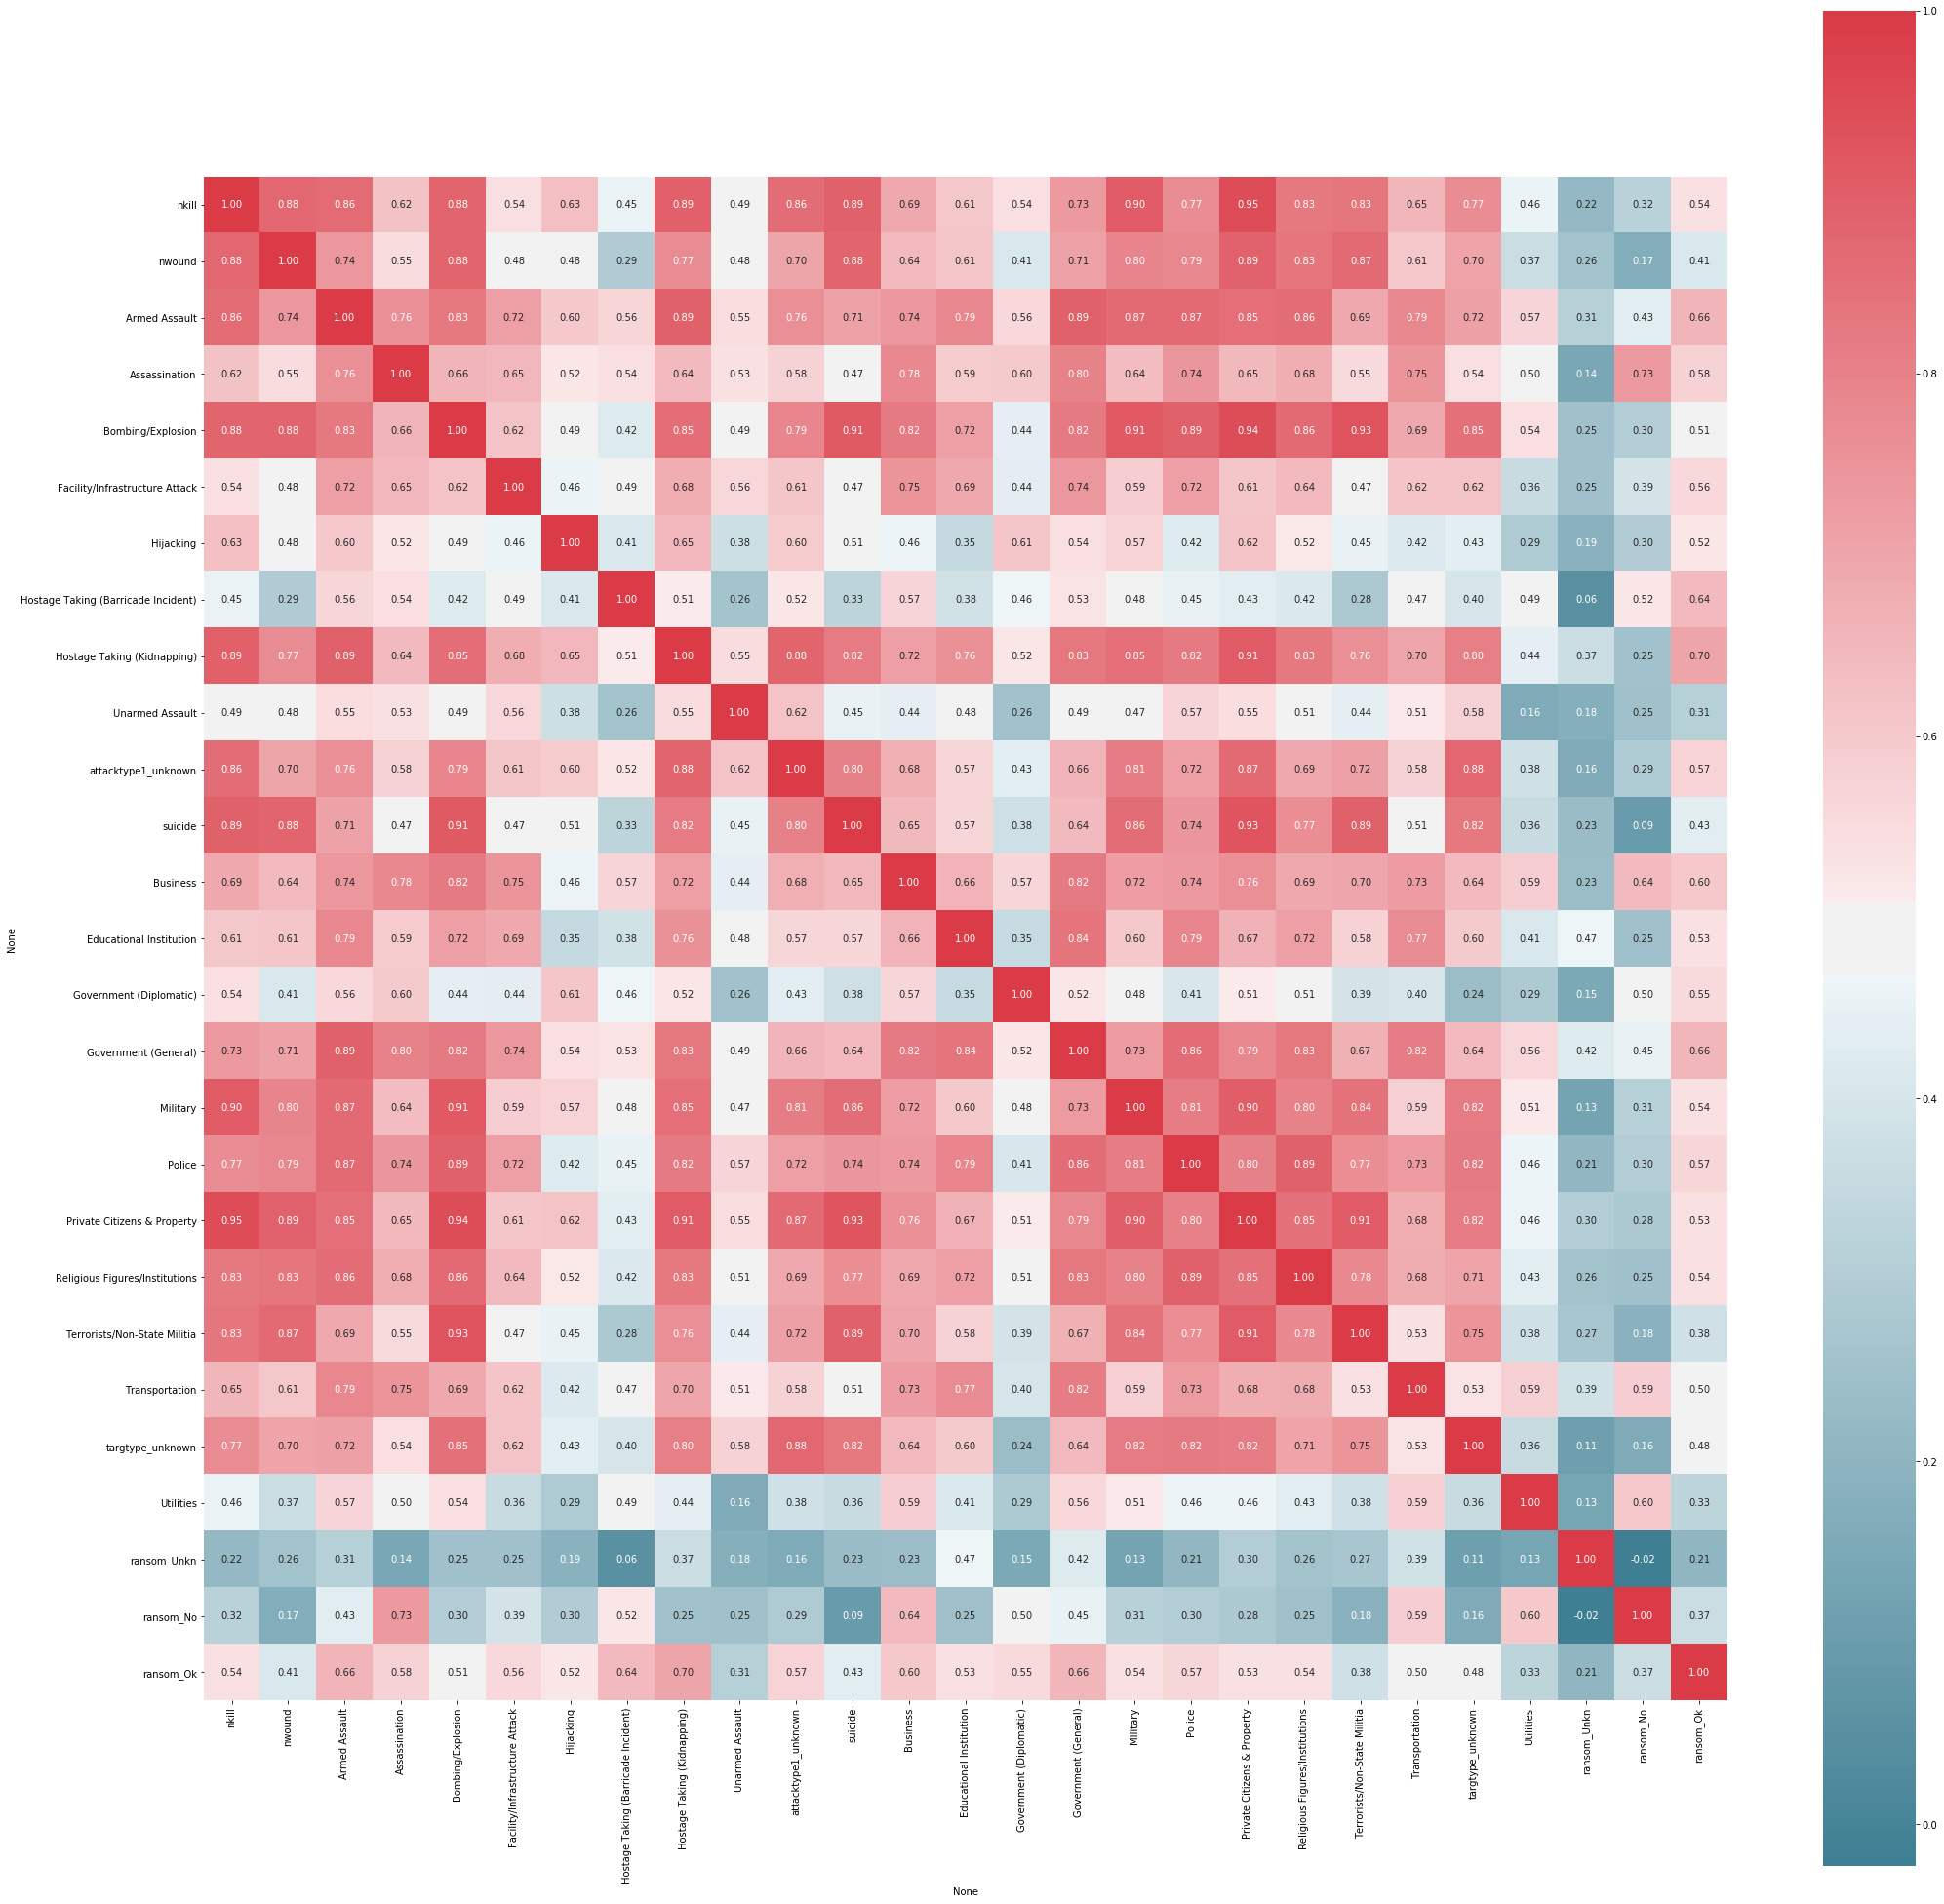

In [24]:
corr = pieno.corr()
plt.subplots(figsize=(35,35))       
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot=True, fmt='.2f')

Le caratteristiche meno correlate al numero di sopravvissuti e morti sono:
* Hostage Taking (incident)
* facility infrastructure attack
* Unarmed Assault
* govermanet (Diplomatic)
* Utilities
* ransom Unkn
* ransom No
* ransom ok

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5685e3b990>,
      dtype=object)

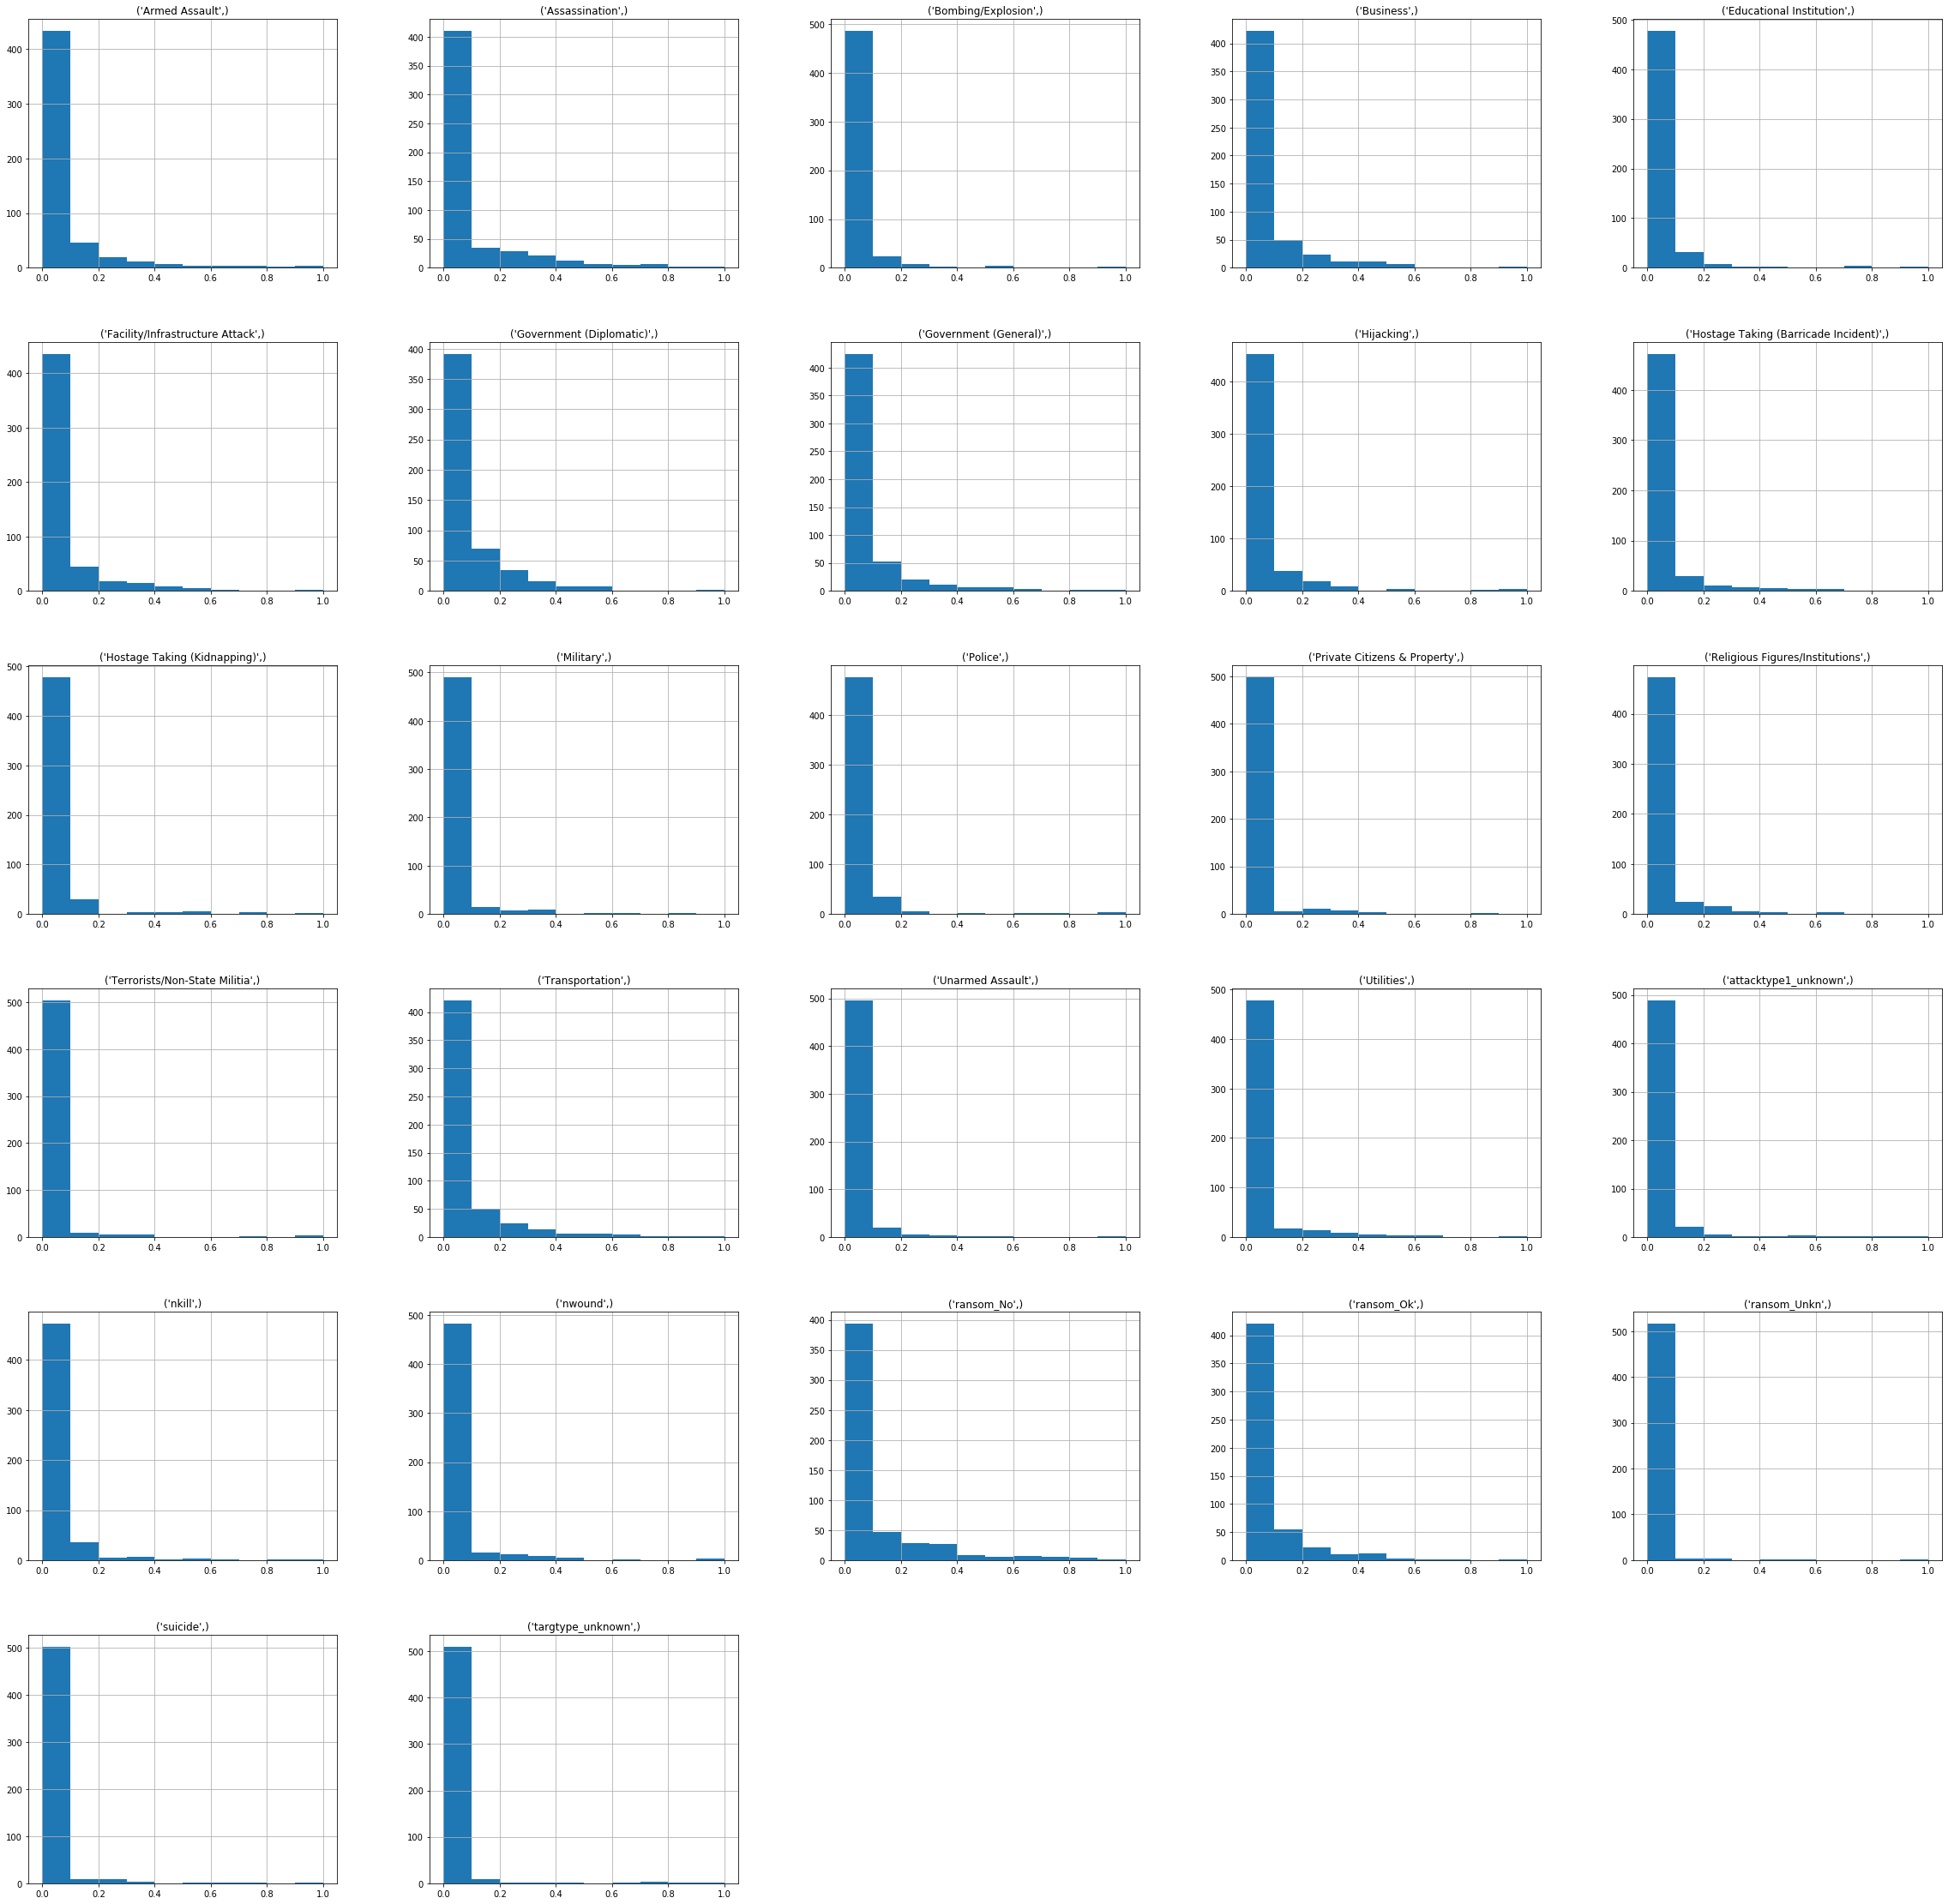

In [25]:
pieno.hist(figsize=(40,40))

In [26]:
columns1 = [
       'nwound','Armed Assault', 'Assassination','Bombing/Explosion', 'Hijacking', 'Hostage Taking (Kidnapping)','attacktype1_unknown','suicide','Business',
       'Educational Institution',
       'Government (General)', 'Military', 'Police',
       'Private Citizens & Property', 'Religious Figures/Institutions',
       'Terrorists/Non-State Militia', 'Transportation', 'targtype_unknown']
columns2 = [
       'nkill','Armed Assault', 'Assassination','Bombing/Explosion', 'Hijacking', 'Hostage Taking (Kidnapping)','attacktype1_unknown','suicide','Business',
       'Educational Institution',
       'Government (General)', 'Military', 'Police',
       'Private Citizens & Property', 'Religious Figures/Institutions',
       'Terrorists/Non-State Militia', 'Transportation', 'targtype_unknown']
print(len(columns1))
print(len(columns2))

18
18


In [27]:
X = ds[columns1]
Y = ds['nkill']

In [28]:
from sklearn.model_selection import train_test_split
X_train_kill, X_test_kill, Y_train_kill, Y_test_kill = train_test_split(X, Y, test_size=0.20, random_state=33)

In [29]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression().fit(X_train_kill, Y_train_kill)
print(linReg.score(X_train_kill, Y_train_kill))
print(linReg.score(X_test_kill, Y_test_kill))

0.9615958339278646
0.871658262946808


In [30]:
linReg.coef_

array([  0.18149282,   6.11296927,   2.5734738 ,   2.1638363 ,
         2.97366654,   8.71825385,   9.13090039,   4.18873251,
        -3.64513442, -11.13421665,  -7.12805858,  -0.33394115,
        -4.90419259,   0.19854647,   4.34128126,  -1.6907352 ,
         7.60919408,  -5.5751394 ])

In [31]:
print('intercept ', linReg.intercept_)
coefficients = pd.Series(linReg.coef_ , index=X.columns)
coefficients.sort_values()

intercept  -15.154243680079048


Educational Institution          -11.134217
Government (General)              -7.128059
targtype_unknown                  -5.575139
Police                            -4.904193
Business                          -3.645134
Terrorists/Non-State Militia      -1.690735
Military                          -0.333941
nwound                             0.181493
Private Citizens & Property        0.198546
Bombing/Explosion                  2.163836
Assassination                      2.573474
Hijacking                          2.973667
suicide                            4.188733
Religious Figures/Institutions     4.341281
Armed Assault                      6.112969
Transportation                     7.609194
Hostage Taking (Kidnapping)        8.718254
attacktype1_unknown                9.130900
dtype: float64

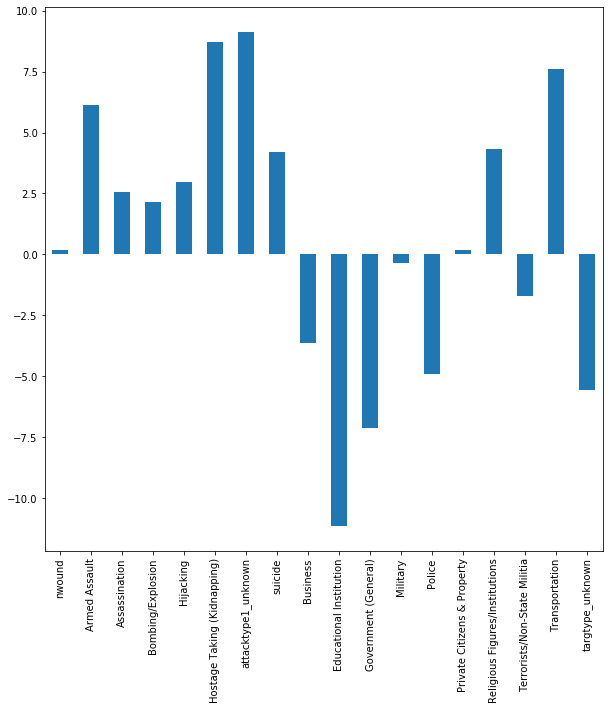

In [32]:
plt.subplots(figsize=(10,10)) 
coefficients.plot(kind="bar")

In [33]:
X = ds[columns2]
Y = ds['nwound']

In [34]:
X_train_wound, X_test_wound, Y_train_wound, Y_test_wound = train_test_split(X, Y, test_size=0.20, random_state=33)

In [35]:
linReg = LinearRegression().fit(X_train_wound, Y_train_wound)
print(linReg.score(X_train_wound, Y_train_wound))
print(linReg.score(X_test_wound, Y_test_wound))

0.8953895031170012
0.8411430838120444


In [36]:
print('intercept ', linReg.intercept_)
coefficients = pd.Series(linReg.coef_ , index=X.columns)
coefficients.sort_values()

intercept  176.68090245147266


Hostage Taking (Kidnapping)      -14.098562
targtype_unknown                  -8.704851
Hijacking                         -6.655079
Armed Assault                     -5.592783
Assassination                     -5.127536
attacktype1_unknown               -3.887582
Bombing/Explosion                 -1.660509
Military                          -0.819394
Business                          -0.215166
nkill                              0.821168
Private Citizens & Property        3.440222
Educational Institution            4.593333
Government (General)               6.584500
Transportation                     8.777867
Police                             9.015951
suicide                           16.554747
Terrorists/Non-State Militia      16.734960
Religious Figures/Institutions    22.153623
dtype: float64

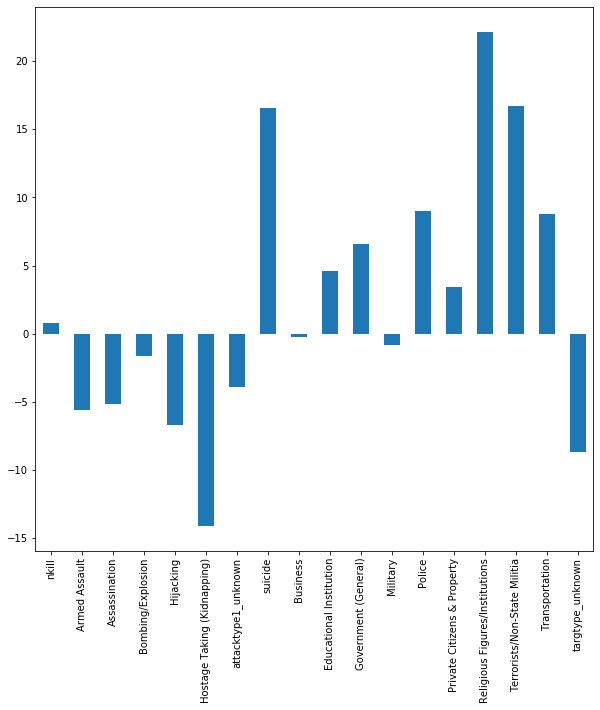

In [37]:
plt.subplots(figsize=(10,10)) 
coefficients.plot(kind="bar")